****
Keys in the NPZ file: ['map', 'imgsize', 'score', 'conf', 'np++']
****


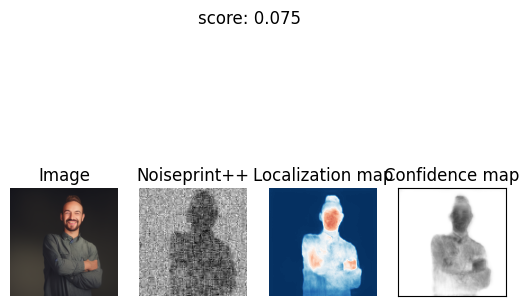

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import argparse


# image_path  = '/data/projects/hyunwoong/TruFor/images/pristine1.jpg'
# output_path = '/data/projects/hyunwoong/TruFor/output/pristine1.jpg.npz'

# image_path = '/data/projects/hyunwoong/TruFor/images/tampered1.png'
# output_path = '/data/projects/hyunwoong/TruFor/output/tampered1.png.npz'

image_path = '/data/projects/hyunwoong/antitifake/TestModel/TruFor/images/fake1.png'
output_path = '/data/projects/hyunwoong/antitifake/TestModel/TruFor/output/fake1.png.npz'

# image_path = '/data/projects/hyunwoong/TruFor/images/fake1.png'
# output_path = '/data/projects/hyunwoong/TruFor/output/fake1.png.npz'

mask_path   = ''

# import os
# absolute_output_path = os.path.abspath(output_path)
# print("Absolute input path:", absolute_output_path)

result = np.load(output_path)
print('****')
with np.load(output_path) as data:
    print("Keys in the NPZ file:", data.files)
print('****')
cols = 3
if mask_path != '':
    cols += 1
    mask = Image.open(mask_path)
else:
    mask = None

if 'np++' in result:
    cols += 1
    noisepr = result['np++']
else:
    noisepr = None

fig, axs = plt.subplots(1, cols)
fig.suptitle('score: %.3f' % result['score'])
# fig.suptitle('score : ')

for ax in axs:
    ax.axis('off')

index = 0
ax = axs[index]
ax.imshow(Image.open(image_path)), ax.set_title('Image')

if mask is not None:
    index += 1
    ax = axs[index]
    ax.imshow(mask, cmap='gray'), ax.set_title('Ground Truth')
    ax.set_yticks(list()), ax.set_xticks(list()), ax.axis('on')

if noisepr is not None:
    index += 1
    ax = axs[index]
    # for a better visualization of the noiseprint++, we remove the border and do a down-sampling (useful if the image is too big)
    ax.imshow(noisepr[16:-16:5, 16:-16:5], cmap='gray'), ax.set_title('Noiseprint++')

index += 1
ax = axs[index]
ax.imshow(result['map'], cmap='RdBu_r', clim=[0,1]), ax.set_title('Localization map')

index += 1
ax = axs[index]
ax.imshow(result['conf'], cmap='gray', clim=[0,1]), ax.set_title('Confidence map')
ax.set_yticks(list()), ax.set_xticks(list()), ax.axis('on')

output_image_path = "/data/projects/hyunwoong/antitifake/TestModel/TruFor/output/output_image.png"  # 원하는 경로와 파일 이름을 지정하세요
plt.savefig(output_image_path)
plt.show()
